In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#Register pandas formatters and converters with matplotlib. Some needed functions will be added

In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates = ["date"], index_col = "date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
# Clean data
df = df[
  (df["value"] >= df["value"].quantile(0.025)) &
  (df["value"] <= df["value"].quantile(0.975))]

LINE plot

Text(0, 0.5, 'Page Views')

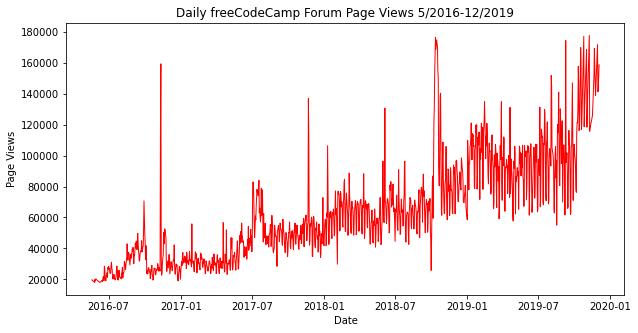

In [6]:
# Draw line plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df["value"], "r", linewidth=1)

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

BAR plot

In [8]:
# Copy and modify data for monthly bar plot
df["month"] = df.index.month
df["year"] = df.index.year
df.head()

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016


In [11]:
df_bar = df.groupby(["year","month"])["value"].mean()
df_bar.head(10)

year  month
2016  5        19432.400000
      6        21875.105263
      7        24109.678571
      8        31049.193548
      9        41476.866667
      10       27398.322581
      11       40448.633333
      12       27832.419355
2017  1        32785.161290
      2        31113.071429
Name: value, dtype: float64

In [12]:
df_bar = df_bar.unstack()
df_bar.head(10)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

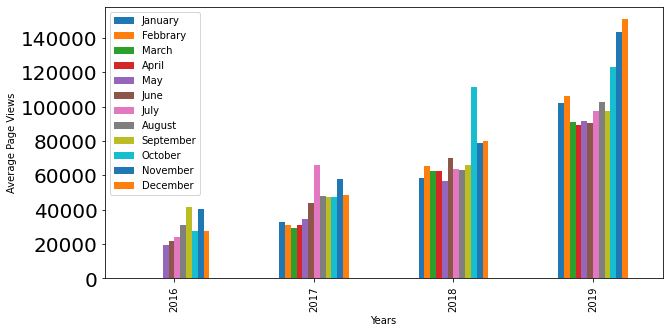

In [13]:
 # Draw bar plot
fig = df_bar.plot.bar(legend=True, figsize= (10,5), ylabel ="Average Page Views", xlabel= "Years").figure

plt.legend(['January','Febbrary','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)

BOX plot

In [16]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,Nov,2019
1234,2019-11-29,171584,Nov,2019
1235,2019-11-30,141161,Nov,2019
1236,2019-12-01,142918,Dec,2019


In [17]:
# Draw box plots (using Seaborn)

df_box['month_num'] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")
df_box

,date,value,month,year,month_num
210,2017-01-06,37353,Jan,2017,1
937,2019-01-06,94108,Jan,2019,1
936,2019-01-05,77897,Jan,2019,1
935,2019-01-04,94514,Jan,2019,1
934,2019-01-03,100710,Jan,2019,1
...,...,...,...,...,...
567,2017-12-29,72819,Dec,2017,12
566,2017-12-28,51018,Dec,2017,12
565,2017-12-27,43075,Dec,2017,12
201,2016-12-28,28424,Dec,2016,12


Text(0, 0.5, 'Page Views')

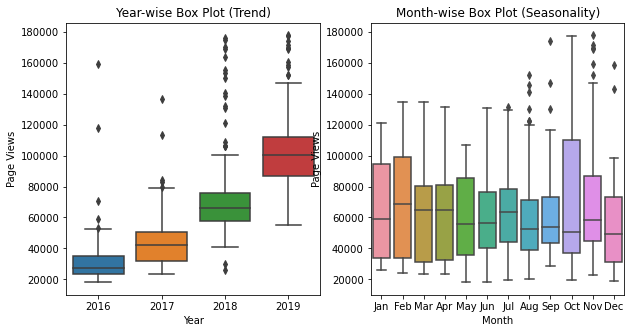

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0] = sns.boxplot (x=df_box["year"], y=df_box["value"], ax = axes[0])
axes[1] = sns.boxplot (x=df_box["month"], y=df_box["value"], ax = axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")